In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from time import sleep
import pyautogui
import keyboard

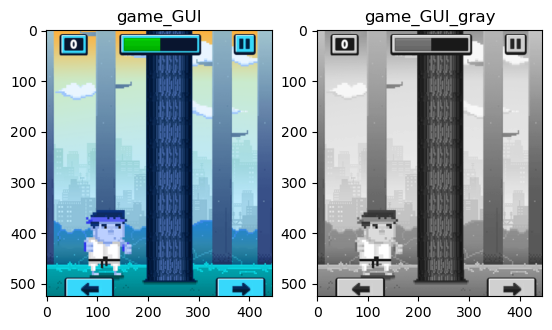

In [8]:
game_GUI_x = 735
game_GUI_y = 300
game_GUI_w = 445
game_GUI_h = 525

# Wait for the key 's' to be presseds
keyboard.wait('s')

# Take a screenshot of the game GUI
screenshot = pyautogui.screenshot(region=(game_GUI_x, game_GUI_y, game_GUI_w, game_GUI_h))

# Convert the screenshot to an OpenCV image
image = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# Create subplots
fig, axs = plt.subplots(1, 2)

# Display the game GUI color image
axs[0].imshow(image)
axs[0].set_title('game_GUI')

# Display the game GUI grayscale image
axs[1].imshow(image_gray, cmap='gray')
axs[1].set_title('game_GUI_gray')

# Show the plot
plt.show()

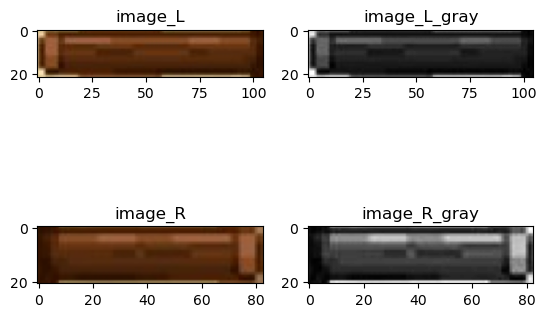

In [4]:

# Load the templates
template_L = cv2.imread("Kick_ya_chop/Left_branch.png")
image_L = cv2.cvtColor(np.array(template_L), cv2.COLOR_RGB2BGR)
image_L_gray = cv2.cvtColor(np.array(template_L), cv2.COLOR_RGB2GRAY)

template_R = cv2.imread("Kick_ya_chop/Right_branch.png")
image_R = cv2.cvtColor(np.array(template_R), cv2.COLOR_RGB2BGR)
image_R_gray = cv2.cvtColor(np.array(template_R), cv2.COLOR_RGB2GRAY)

# Create subplots
fig, axs = plt.subplots(2, 2)

# Display the left color image
axs[0, 0].imshow(image_L)
axs[0, 0].set_title('image_L')

# Display the left grayscale image
axs[0, 1].imshow(image_L_gray, cmap='gray')
axs[0, 1].set_title('image_L_gray')

# Display the right color image
axs[1, 0].imshow(image_R)
axs[1, 0].set_title('image_R')

# Display the right grayscale image
axs[1, 1].imshow(image_R_gray, cmap='gray')
axs[1, 1].set_title('image_R_gray')

# Show the plot
plt.show()

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


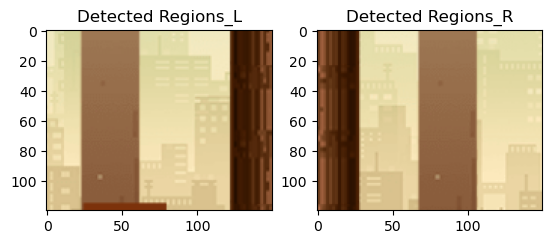

In [9]:
# Set a threshold for the matching result
threshold = 0.8

# Crop the image
cropped_image_L = image_gray[240:360, 75:225]
cropped_image_L_C = image[240:360, 75:225]
cropped_image_R = image_gray[240:360, 260:410]
cropped_image_R_C = image[240:360, 260:410]

# Perform template matching
result_L = cv2.matchTemplate(cropped_image_L, image_L_gray, cv2.TM_CCOEFF_NORMED)
result_R = cv2.matchTemplate(cropped_image_R, image_R_gray, cv2.TM_CCOEFF_NORMED)



# Find the locations where the template matches above the threshold
locations_L = np.where(result_L >= threshold)
locations_R = np.where(result_R >= threshold)


print(locations_L)
print(locations_R)


# Create a copy of the original image
image_with_rectangles_L = cropped_image_L_C.copy()
image_with_rectangles_R = cropped_image_R_C.copy()

# Draw rectangles around the detected regions
for pt in zip(*locations_L[::-1]):
    cv2.rectangle(image_with_rectangles_L, pt, (pt[0] + image_L_gray.shape[1], pt[1] + image_L_gray.shape[0]), (0, 255, 0), 2)
for pt in zip(*locations_R[::-1]):
    cv2.rectangle(image_with_rectangles_R, pt, (pt[0] + image_R_gray.shape[1], pt[1] + image_R_gray.shape[0]), (0, 0, 255), 2)

# Create subplots
fig, axs = plt.subplots(1, 2)

# Display the cropped image left
axs[0].imshow(cv2.cvtColor(image_with_rectangles_L, cv2.COLOR_BGR2RGB))
axs[0].set_title('Detected Regions_L')

# Display the cropped image right
axs[1].imshow(cv2.cvtColor(image_with_rectangles_R, cv2.COLOR_BGR2RGB))
axs[1].set_title('Detected Regions_R')

# Show the plot
plt.show()



In [6]:
import time
left_or_right = False # False for left cut, True for right cut

game_GUI_x = 735
game_GUI_y = 300
game_GUI_w = 445
game_GUI_h = 525

threshold = 0.8 # Set a threshold for the matching result

# Wait for the key 's' to be pressed
keyboard.wait('s')

while True:

    #Take a screenshot of the game GUI
    screenshot = pyautogui.screenshot(region=(game_GUI_x, game_GUI_y, game_GUI_w, game_GUI_h))
    image = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2BGR)
    image_gray = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2GRAY)
        

    #selecting the template based on the current direction
    if left_or_right == False:
        cropped_image = image_gray[240:360, 75:225]
        template = image_L_gray

    else:
        cropped_image = image_gray[240:360, 260:410]
        template = image_R_gray

    # Perform template matching based on the current direction
    result = cv2.matchTemplate(cropped_image, template, cv2.TM_CCOEFF_NORMED)

    # Find the locations where the template matches above the threshold
    locations = np.where(result >= threshold)

    print(locations)  # Output: (array([], dtype=int64), array([], dtype=int64))

    # Check if a branch is detected and update the direction
    if len(locations[0]) > 0:
        print("Branch detected!")
        left_or_right = not left_or_right

    print(left_or_right)  # Output: True

    if left_or_right == False:
        print("Left")   # Output: Left
        pyautogui.press('left')
    else:
        print("Right")  # Output: Right 
        pyautogui.press('right')

    """    
    # Create subplots
    fig, axs = plt.subplots(1, 3)

    # Display the game GUI color image
    axs[0].imshow(screenshot)
    axs[0].set_title('game_GUI')

    # Display the game GUI grayscale image
    axs[1].imshow(cropped_image, cmap='gray')
    axs[1].set_title('cropped_image_gray')

    # Create a copy of the original image
    image_copy = image.copy()
    
    
    for pt in zip(*locations[::-1]):
        cv2.rectangle(cropped_image, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

    # Display the game GUI grayscale image
    axs[2].imshow(cropped_image, cmap='gray')
    axs[2].set_title('cropped_image_gray')

    # Show the plot
    plt.show()
    """

    time.sleep(0.003)  # 3 milliseconds

    if keyboard.is_pressed('q'):
        break


(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([87, 87], dtype=int64), array([25, 26], dtype=int64))
Branch detected!
True
Right
(array([], dtype=int64), array([], dtype=int64))
True
Right
(array([87], dtype=int64), array([26], dtype=int64))
Branch detected!
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([], dtype=int64), array([], dtype=int64))
False
Left
(array([87, 87], dtype=int64), array([25, 26], dtype=int64))
Branch detected!
True
Right
(array([], dtype=int64), array([], dtype=int64))
True
Right
(array([87], dtype=in